# Ford GoBike System Data

## Investigation Overview

This document explores a dataset containing data from Ford GoBike, a Bay Area's bike sharing system.
The main focus is on trip duration.

## Dataset Overview

Ford GoBike has data from mid 2017 to mid 2020. For the purpose of this analysis, I will focus on data for 2019, which includes data for 2506983 trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipyleaflet import Map, Heatmap

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
trips = pd.read_csv("trips.csv")
trips_loc = pd.read_csv("trips_locations.csv")

In [3]:
# wrangling of data
# convertin variables to category format
trips.user_type = trips.user_type.astype('category')

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
trips['month'] = pd.Categorical(trips['month'], categories=months, ordered=True)

weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", 
          "Sun"]
trips['weekday'] = pd.Categorical(trips['weekday'], categories=weekdays, ordered=True)

hours = list(trips['hour'].value_counts().index.sort_values())
trips['hour'] = pd.Categorical(trips['hour'], categories=hours, ordered=True)

# create filtered trips
trips_f = trips[(trips['duration_sec'] > 60) & (trips['duration_sec'] < 1000)]

### 1. When are most trips taken in terms of time of day, day of the week, or month of the year?

- Time of day: 17:00
- Day of the week: Tuesday
- Month of the year: July

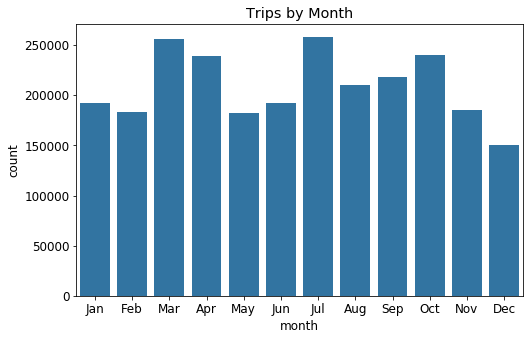

In [4]:
base_color = sns.color_palette()[0]
plt.rc('font', size=12)
plt.figure(figsize=[8, 5])
sns.countplot(data = trips, x = 'month', color=base_color)
plt.title('Trips by Month');

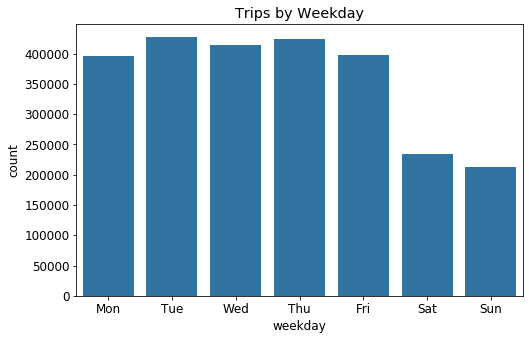

In [5]:
plt.figure(figsize=[8, 5])
sns.countplot(data = trips, x = 'weekday', color=base_color)
plt.title('Trips by Weekday');

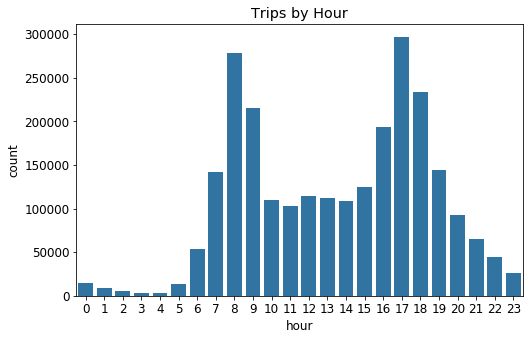

In [6]:
plt.figure(figsize=[8, 5])
sns.countplot(data = trips, x = 'hour', color=base_color)
plt.title('Trips by Hour');

### 2. How long does the average trip take?

The average trips takes around 500 seconds. This is after wrangling the data and logarithmic transformation.

The orginal dataset shows an average of 800 seconds. However, this includes many, very high outliers.

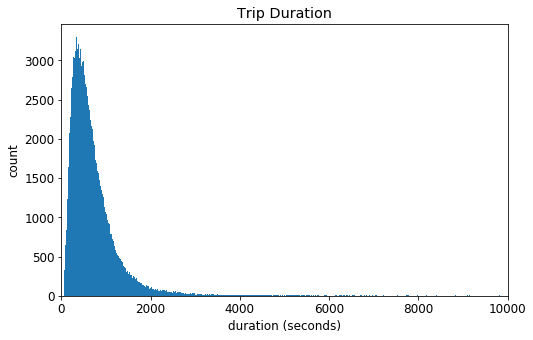

In [7]:
bin_edges = np.arange(0, 10000 + 1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = trips, x = 'duration_sec', bins = bin_edges)
plt.xlim(0, 10000)
plt.title('Trip Duration')
plt.xlabel('duration (seconds)')
plt.ylabel('count');

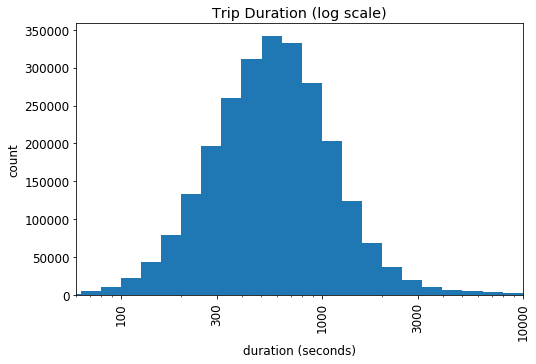

In [8]:
bin_edges = 10 ** np.arange(0.8, np.log10(trips.duration_sec.max())+0.1, 0.1)
plt.figure(figsize=[8, 5])
plt.hist(trips.duration_sec, bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.xticks(tick_locs, tick_locs, rotation = 90)
plt.xlim(60, 10000)
plt.title('Trip Duration (log scale)')
plt.xlabel('duration (seconds)')
plt.ylabel('count');

### 3. Does the duration of a trip per month, weekday or hour depend on if a user is a subscriber or customer?

Yes. The average duration for the subscriber is lower in all cases.

However, less than 20% of the users are customers.

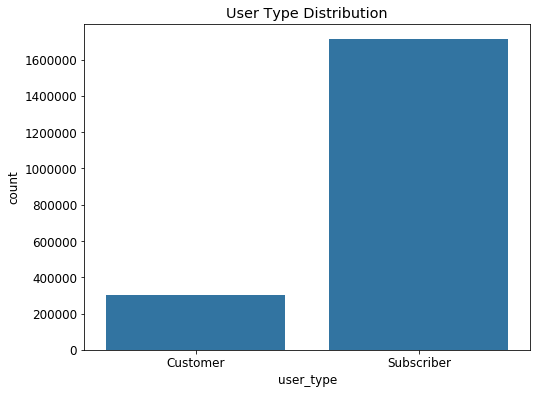

In [9]:
plt.figure(figsize = [8, 6])
sns.countplot(data = trips_f, x = 'user_type', color=base_color);
plt.title('User Type Distribution');

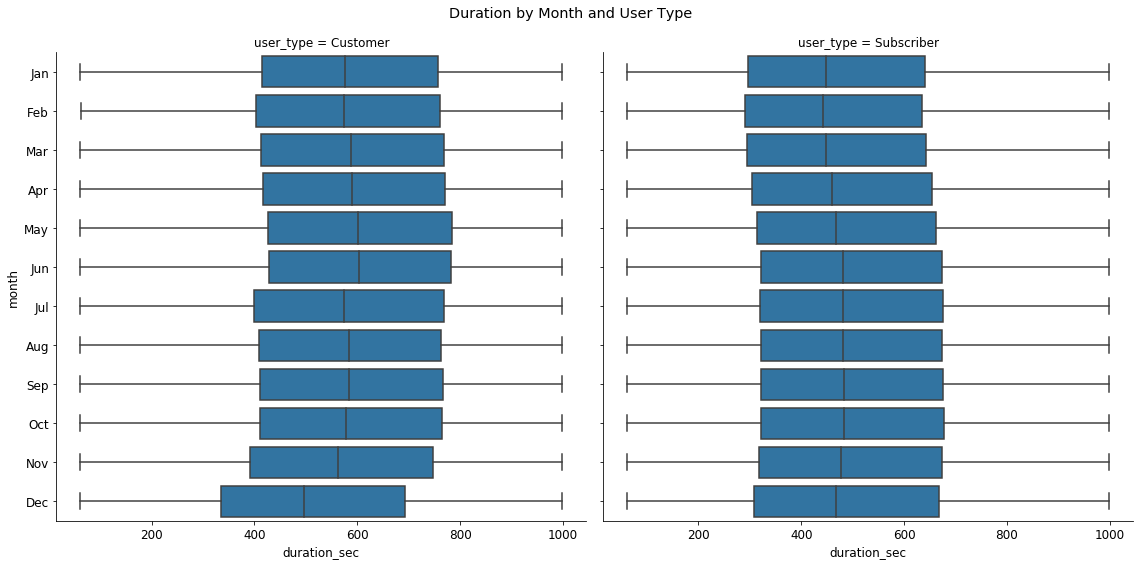

In [10]:
g = sns.FacetGrid(data = trips_f, col = 'user_type', height = 8)
g.map(sns.boxplot, 'duration_sec', 'month')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Duration by Month and User Type');

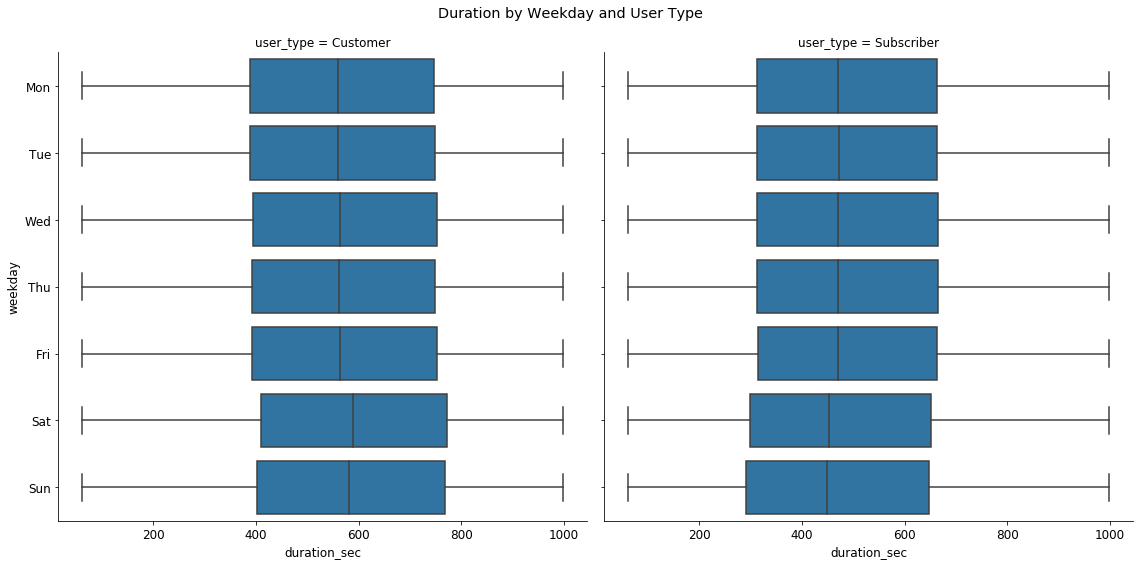

In [11]:
g = sns.FacetGrid(data = trips_f, col = 'user_type', height = 8)
g.map(sns.boxplot, 'duration_sec', 'weekday')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Duration by Weekday and User Type');

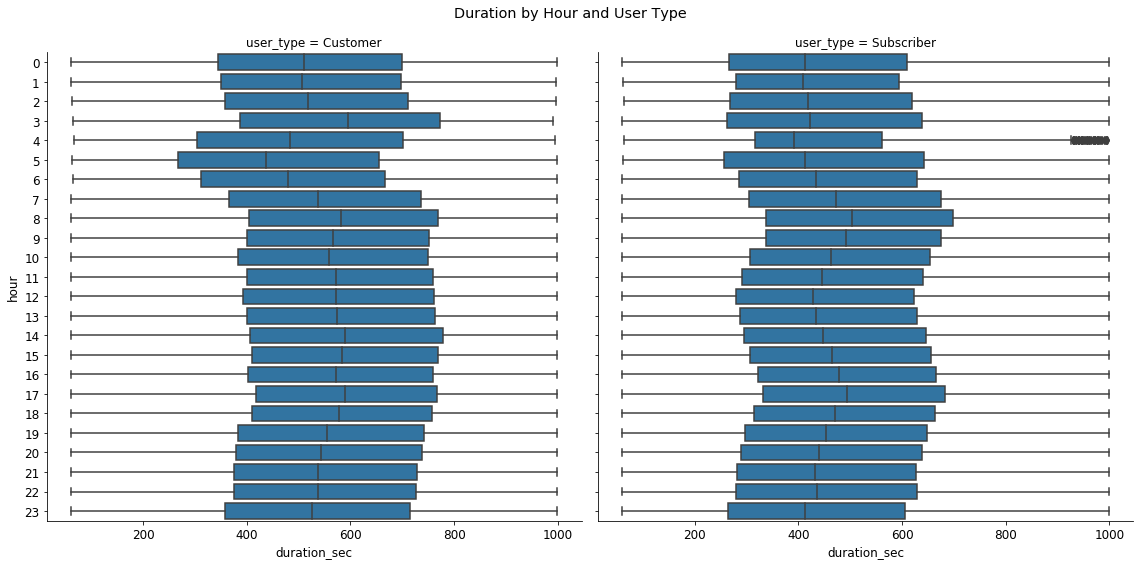

In [12]:
g = sns.FacetGrid(data = trips_f, col = 'user_type', height = 8)
g.map(sns.boxplot, 'duration_sec', 'hour');
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Duration by Hour and User Type');